Primero, se carga el conjunto de datos.

In [ ]:
import numpy as np
import pandas as pd
archivo = '/content/VEM_2019.csv'
V = pd.read_csv(archivo, index_col=0)
V.head()

,id_hogar,id_persona,id_viaje,fecha,lugar_origen,zat_origen,p17_Id_motivo_viaje,hora_inicio_viaje,p28_lugar_destino,zat_destino,...,utam_origen,utam_destino,modo_principal,estrato,tipo_vivienda,propiedad_vivienda,edad,nivel_educativo,ocupación,sexo
0,33754,2,1,43669.0,1.0,204.0,5,0.333333,2.0,554.0,...,UTAM31,UTAM86,SITP Provisional,3,1,3,37,2,38,Mujer
1,33770,2,3,43669.0,2.0,299.0,6,0.625000,1.0,973.0,...,UTAM105,UTAM54,Transporte informal,2,2,1,60,2,31,Mujer
2,3882,3,1,43605.0,1.0,551.0,1,0.250000,2.0,324.0,...,UTAM84,UTAM112,SITP Zonal,2,2,1,28,13,16,Hombre
3,5189,4,1,43554.0,1.0,17.0,1,0.333333,2.0,7.0,...,UTAM10,UTAM1,SITP Zonal,4,1,3,21,10,2,Hombre
4,5636,2,2,43558.0,2.0,554.0,6,0.708333,1.0,933.0,...,UTAM86,UTAM573,Transporte informal,0,2,2,34,7,19,Mujer


In [ ]:
V.info() #Tipos de las variables contenidas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134497 entries, 0 to 134496
Data columns (total 37 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_hogar                           134497 non-null  object 
 1   id_persona                         134497 non-null  int64  
 2   id_viaje                           134497 non-null  int64  
 3   fecha                              127364 non-null  float64
 4   lugar_origen                       127364 non-null  float64
 5   zat_origen                         127363 non-null  float64
 6   p17_Id_motivo_viaje                134497 non-null  int64  
 7   hora_inicio_viaje                  134497 non-null  float64
 8   p28_lugar_destino                  127364 non-null  float64
 9   zat_destino                        127361 non-null  float64
 10  p30_camino_cuadras                 127347 non-null  float64
 11  p30_camino_minutos                 1273

In [ ]:
V.mode() #identificar los valores más frecuentes(moda) para cada variable

,id_hogar,id_persona,id_viaje,fecha,lugar_origen,zat_origen,p17_Id_motivo_viaje,hora_inicio_viaje,p28_lugar_destino,zat_destino,...,utam_origen,utam_destino,modo_principal,estrato,tipo_vivienda,propiedad_vivienda,edad,nivel_educativo,ocupación,sexo
0,34452,1.0,1.0,43589.0,2.0,913.0,6.0,0.25,2.0,913.0,...,UTAM97,UTAM97,A pie,2.0,2.0,1.0,24.0,7.0,16.0,Mujer
1,P00975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
V['p33_cual_aplicacion_antes_viaje'].mode()

0    WAZE
Name: p33_cual_aplicacion_antes_viaje, dtype: object

En el conjunto de datos, hay variables de tipo categórico que están representadas por medio de números, por lo tanto, cuando se carga el archivo, estás variables se definen automáticamente como de tipo númerico (int y float). En ese sentido, se decide transformar estas variables a string. Igualmente, dado que en el conjunto de datos hay una serie de variables binarias en las que no se registra uno de los dos posibles valores, se asignan ceros en los datos faltantes de estas variables.

In [ ]:
col_object = ['fecha','lugar_origen','id_hogar','id_persona','id_viaje','zat_origen','zat_destino','p17_Id_motivo_viaje',
              'estrato','mun_origen', 'mun_destino', 'tipo_vivienda', 'propiedad_vivienda',
              'p28_lugar_destino','p33_aplicacion_antes_viaje', 'p34_aplicacion_durante_viaje', 'estrato', 'ocupación', 'nivel_educativo']
for col in col_object: V[col] = V[col].astype(str)
#Insertar ceros en las variables binarias
col_binarias = ['p32_lunes','p32_martes','p32_miercoles','p32_jueves','p32_viernes','p32_sabado','p32_domingo','p32_ocasional']
for col in col_binarias: V[col] = V[col].fillna(0)

In [ ]:
V.corr()

<ipython-input-17-19f97f8d4d77>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  V.corr()


,hora_inicio_viaje,p30_camino_cuadras,p30_camino_minutos,p31_hora_llegada,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,edad
hora_inicio_viaje,1.000000,-0.010980,-0.008296,0.963097,-0.134395,-0.129087,-0.129950,-0.127018,-0.112374,-0.016259,0.026338,0.112341,0.005706
p30_camino_cuadras,-0.010980,1.000000,0.716183,-0.007024,0.020318,0.019456,0.017801,0.019839,0.025911,-0.015383,-0.006685,-0.019085,-0.016351
p30_camino_minutos,-0.008296,0.716183,1.000000,0.000077,0.001468,0.001304,-0.000257,0.001008,0.005979,-0.021626,0.005602,-0.001423,0.025166
p31_hora_llegada,0.963097,-0.007024,0.000077,1.000000,-0.146993,-0.142696,-0.142894,-0.140862,-0.123330,-0.011486,0.016977,0.121434,0.009762
p32_lunes,-0.134395,0.020318,0.001468,-0.146993,1.000000,0.892583,0.936671,0.890397,0.617951,0.265640,0.192731,-0.805006,-0.097929
p32_martes,-0.129087,0.019456,0.001304,-0.142696,0.892583,1.000000,0.894395,0.939096,0.585879,0.278246,0.200062,-0.797134,-0.101105
p32_miercoles,-0.129950,0.017801,-0.000257,-0.142894,0.936671,0.894395,1.000000,0.890947,0.622254,0.270373,0.202233,-0.813859,-0.098329
p32_jueves,-0.127018,0.019839,0.001008,-0.140862,0.890397,0.939096,0.890947,1.000000,0.578780,0.279535,0.201619,-0.797870,-0.100092
p32_viernes,-0.112374,0.025911,0.005979,-0.123330,0.617951,0.585879,0.622254,0.578780,1.000000,-0.169169,-0.149317,-0.561711,-0.100423
p32_sabado,-0.016259,-0.015383,-0.021626,-0.011486,0.265640,0.278246,0.270373,0.279535,-0.169169,1.000000,-0.023640,-0.257748,0.001572


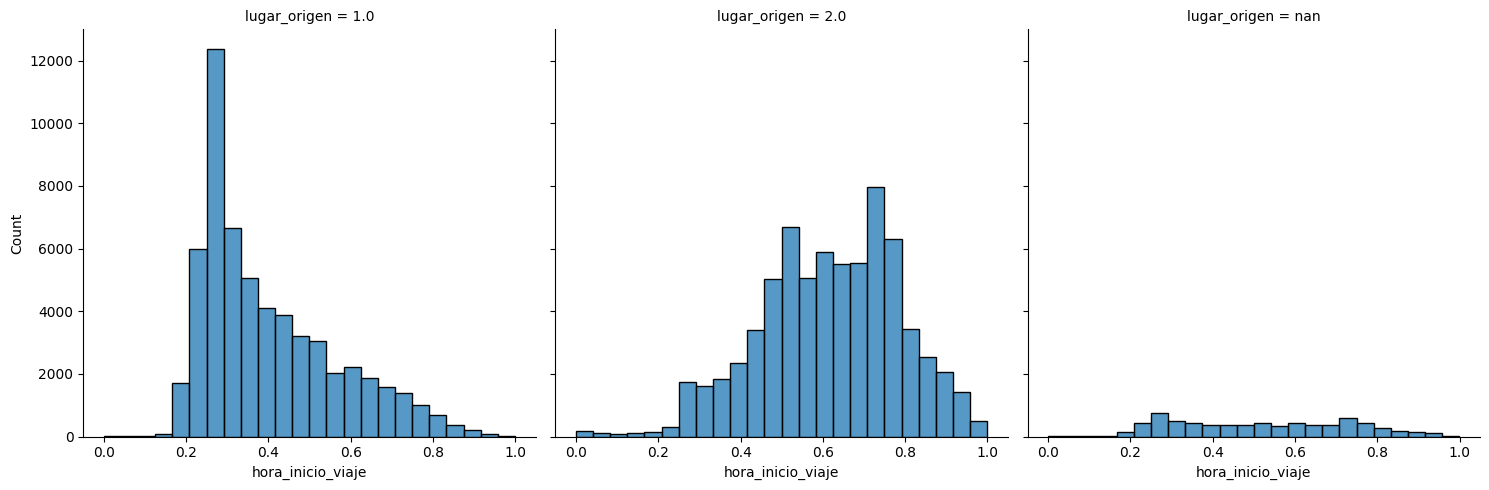

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(data = V, x = 'hora_inicio_viaje', col = 'lugar_origen', bins=24)
#plt.savefig('histograma_hora.png')

Se añade una nueva variable al conjunto de datos, esta variable corresponde a 'tiempo de viaje' y se obtiene de restar la hora de inicio y la hora de llegada de cada viaje. Contar con dicha variable, por una parte, nos permite disponer de información clave para la caracterización de los desplazamientos de las personas, y por otra parte, nos permite validar los valores contenidos en las variables 'hora de inicio' y 'hora de llegada'.


In [ ]:
#Añadir una nueva variable: tiempo de viaje en minutos
V['tiempo_viaje'] = (V['p31_hora_llegada'] - V['hora_inicio_viaje']) *(24*60)

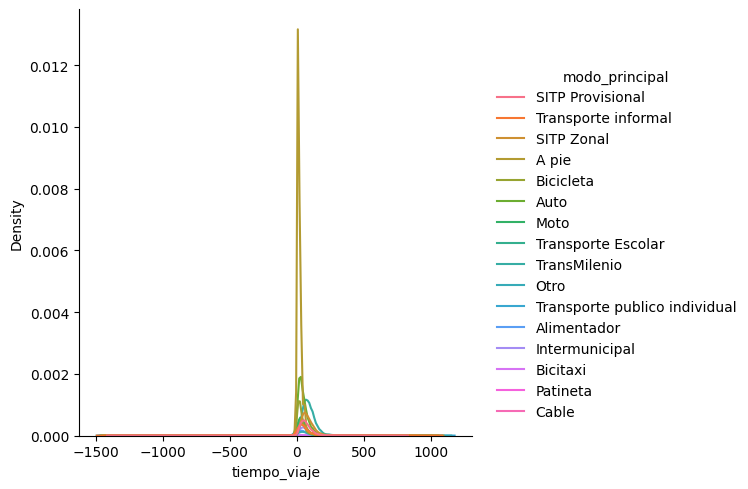

In [ ]:
sns.displot(data = V, x = 'tiempo_viaje', hue = 'modo_principal', kind = 'kde')

In [ ]:
V.describe()

,hora_inicio_viaje,p30_camino_cuadras,p30_camino_minutos,p31_hora_llegada,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,edad,tiempo_viaje
count,134497.000000,127347.000000,127364.000000,134497.000000,134497.000000,134497.000000,134497.000000,134497.000000,134497.000000,134497.000000,134497.000000,134497.000000,134497.000000,134497.000000
mean,0.509670,5.028536,8.793411,0.542763,0.519833,0.514926,0.525291,0.515387,0.345168,0.099898,0.062076,0.374447,37.740306,47.652684
std,0.199154,7.978554,11.137361,0.201241,0.499608,0.499779,0.499362,0.499765,0.475425,0.299865,0.241294,0.483982,57.749539,78.375593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,-1434.000001
25%,0.333333,1.000000,1.000000,0.361111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,15.000000
50%,0.500000,3.000000,5.000000,0.534722,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,36.000000,30.000001
75%,0.666667,6.000000,10.000000,0.708333,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,53.000000,60.000000
max,0.999306,127.000000,127.000000,0.999306,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9999.000000,1110.000001


In [ ]:
print('Partición de los viajes por modo\n')
print(V.groupby('modo_principal').size()/V.shape[0]) #Porcentaje de cada modo de transporte en el total de viajes

Partición de los viajes por modo

modo_principal
A pie                            0.366900
Alimentador                      0.012402
Auto                             0.138739
Bicicleta                        0.058462
Bicitaxi                         0.001212
Cable                            0.000037
Intermunicipal                   0.025064
Moto                             0.043815
Otro                             0.013272
Patineta                         0.000803
SITP Provisional                 0.044670
SITP Zonal                       0.073793
TransMilenio                     0.123341
Transporte Escolar               0.026157
Transporte informal              0.032648
Transporte publico individual    0.038685
dtype: float64


In [ ]:
def particion(variable):
  print('Comopisición relativa de:',variable)
  print(V.groupby(variable).size()/V.shape[0])

for i in ['lugar_origen','p28_lugar_destino', 'sexo', 'p33_aplicacion_antes_viaje']:
   particion(i)

Comopisición relativa de: lugar_origen
lugar_origen
1.0    0.428433
2.0    0.518532
nan    0.053035
dtype: float64
Comopisición relativa de: p28_lugar_destino
p28_lugar_destino
1.0    0.418441
2.0    0.528525
nan    0.053035
dtype: float64
Comopisición relativa de: sexo
sexo
Hombre    0.473274
Mujer     0.526726
dtype: float64
Comopisición relativa de: p33_aplicacion_antes_viaje
p33_aplicacion_antes_viaje
1.0    0.049860
2.0    0.897001
9.0    0.000104
nan    0.053035
dtype: float64


<Axes: >

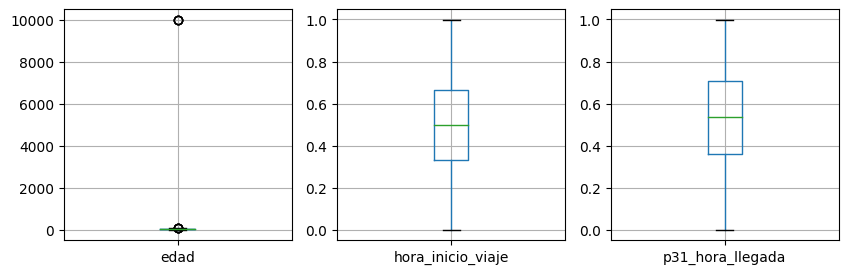

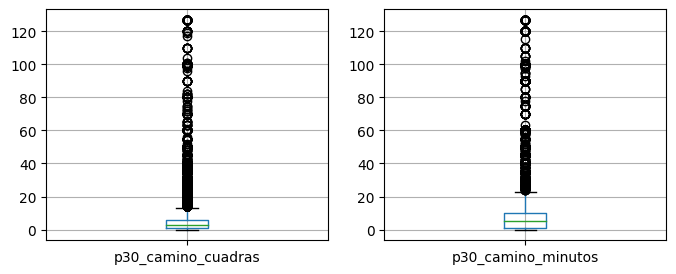

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 3))
plt.subplot(1,3,1)
V.boxplot('edad')
plt.subplot(1,3,2)
V.boxplot('hora_inicio_viaje')
plt.subplot(1,3,3)
V.boxplot('p31_hora_llegada')
plt.savefig('outliers_1.png')
plt.figure(figsize = (8, 3))
plt.subplot(1,2,1)
V.boxplot('p30_camino_cuadras')
plt.subplot(1,2,2)
V.boxplot('p30_camino_minutos')
#plt.savefig('outliers_2.png')

#sns.catplot(data = V, y = ('p30_camino_cuadras','p30_camino_minutos', 'edad','hora_inicio_viaje','p31_hora_llegada'), kind = 'box')

In [ ]:
x = V.groupby('modo_principal').mean() #Promedio de cada una de las variables númericas desagregadas por modo principal
#x.to_excel('x.xlsx')

<ipython-input-25-4d7c98f3ebab>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  x = V.groupby('modo_principal').mean() #Promedio de cada una de las variables númericas desagregadas por modo principal


In [ ]:
V.groupby('modo_principal').median() #Mediana de cada una de las variables númericas desagregadas por modo principal

<ipython-input-26-2c4de5037a88>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  V.groupby('modo_principal').median() #Mediana de cada una de las variables númericas desagregadas por modo principal


,hora_inicio_viaje,p30_camino_cuadras,p30_camino_minutos,p31_hora_llegada,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,edad,tiempo_viaje
modo_principal,,,,,,,,,,,,,,
A pie,0.500000,6.0,10.0,0.520833,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,33.0,15.000000
Alimentador,0.500000,3.0,5.0,0.531250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,45.000000
Auto,0.520833,0.0,0.0,0.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,44.0,38.000000
Bicicleta,0.500000,0.0,0.0,0.520833,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,31.0,25.000000
Bicitaxi,0.479167,1.0,2.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,37.0,20.000000
Cable,0.375000,1.0,10.0,0.500000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,30.0,80.000001
Intermunicipal,0.500000,2.0,5.0,0.552083,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,34.0,59.999999
Moto,0.500000,0.0,0.0,0.541667,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,32.0,35.000001
Otro,0.510417,1.0,2.0,0.562500,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,34.0,45.000000


**Integración de datos:**

Uso de subsidio del SITP en alguno de los viajes del día anterior.

In [ ]:
personas = pd.read_csv('/content/PersonasEODH2019.csv', sep=';')
personas.head()

,id_hogar,id_persona,p3_id_parentesco_jh,p4_edad,p5_id_nivel_educativo,p6_id_ocupacion,p6_id_ocupacion_O1,p6_id_ocupacion_O2,p6_id_ocupacion_O3,p7_id_actividad_economica,...,p16me_lugar_agresion_14,p16me_lugar_agresion_15,p16me_lugar_agresion_16,p17me_acurrio_deli_1,p17me_acurrio_deli_2,p17me_acurrio_deli_3,p17me_acurrio_deli_4,p17me_acurrio_deli_5,f_exp,Sexo
0,10005,2,2,57,4.0,19.0,31.0,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.904350,Mujer
1,10009,2,2,37,5.0,19.0,NaN,NaN,NaN,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.384772,Mujer
2,10015,2,2,35,9.0,33.0,31.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.776101,Mujer
3,10017,2,2,46,11.0,17.0,NaN,NaN,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111.983976,Mujer
4,10006,2,2,50,3.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.890452,Mujer


In [ ]:
def subsidio(X):
  subsidio = X.groupby('p15v_subsidio_SITP').size()/X.shape[0]
  print('Composición porcentual de las respuestas a la pregunta sobre el uso de subsidios del SITP\n',subsidio)
  print('Datos faltantes =',int((1 - subsidio.sum())*X.shape[0]))
subsidio(personas)

Composición porcentual de las respuestas a la pregunta sobre el uso de subsidios del SITP
 p15v_subsidio_SITP
1.0    0.011928
2.0    0.003337
3.0    0.009309
4.0    0.728479
9.0    0.003652
dtype: float64
Datos faltantes = 16257


Completar los datos faltantes con la información de las personas. Especificamente, empleando la edad, si no reportó alguna dificultad fisica y si alguien del hogar recibe subsidio por SISBEN.

In [ ]:
personas['p15v_subsidio_SITP'] = np.where(personas['p15v_subsidio_SITP']==9.0, np.NaN, personas['p15v_subsidio_SITP'])
#Subsidio para adulto mayor
personas['p15v_subsidio_SITP'] = np.where(np.logical_and(np.isnan(personas['p15v_subsidio_SITP']),personas['p4_edad']>62),1.0,personas['p15v_subsidio_SITP'])
subsidio(personas)

#Subsidio para personas con alguna discapacidad
personas['p15v_subsidio_SITP'] = np.where(np.logical_and(np.isnan(personas['p15v_subsidio_SITP']),personas['p8_id_dificultad_fisica_7']==0),2.0,personas['p15v_subsidio_SITP'])
subsidio(personas)

#Lista con los hogares en los que algún integrante cuenta con subsidio por SISBEN
hogares_sisben = pd.unique(personas.loc[personas['p15v_subsidio_SITP']==3.0]['id_hogar'])
#Se crea una nueva variable que toma 1 si alguien en el hogar de la persona reporta tener subsidio por SISBEN o 0 si no, para luego obtener el subsidio por SISBEN
personas['hogar_sisben'] = [np.where(personas['id_hogar'].iloc[i] in hogares_sisben, 1, 0) for i in range(personas.shape[0])]
personas['p15v_subsidio_SITP'] = np.where(np.logical_and(np.isnan(personas['p15v_subsidio_SITP']),personas['hogar_sisben']==1),3.0,personas['p15v_subsidio_SITP'])
subsidio(personas)

#El resto de personas se asumen sin subsidio
personas['p15v_subsidio_SITP'] = personas['p15v_subsidio_SITP'].fillna(4.0)
subsidio(personas)

Composición porcentual de las respuestas a la pregunta sobre el uso de subsidios del SITP
 p15v_subsidio_SITP
1.0    0.056495
2.0    0.003337
3.0    0.009309
4.0    0.728479
dtype: float64
Datos faltantes = 13523
Composición porcentual de las respuestas a la pregunta sobre el uso de subsidios del SITP
 p15v_subsidio_SITP
1.0    0.056495
2.0    0.016477
3.0    0.009309
4.0    0.728479
dtype: float64
Datos faltantes = 12645
Composición porcentual de las respuestas a la pregunta sobre el uso de subsidios del SITP
 p15v_subsidio_SITP
1.0    0.056495
2.0    0.016477
3.0    0.014427
4.0    0.728479
dtype: float64
Datos faltantes = 12303
Composición porcentual de las respuestas a la pregunta sobre el uso de subsidios del SITP
 p15v_subsidio_SITP
1.0    0.056495
2.0    0.016477
3.0    0.014427
4.0    0.912601
dtype: float64
Datos faltantes = 0


Ahora se realiza la integración de la columna 'p15v_subsidio_SITP' contenida en el conjunto 'personas' al conjunto de datos 'V', empleando como identificadores 'id_persona' e 'id_hogar'.

In [ ]:
for i in ['id_persona','id_hogar']: personas[i] = personas[i].astype(str)
V_sub = V.merge(personas.loc[:,['id_persona','id_hogar','p15v_subsidio_SITP']], how='left', on=['id_persona','id_hogar'])
V_sub.head()

,id_hogar,id_persona,id_viaje,fecha,lugar_origen,zat_origen,p17_Id_motivo_viaje,hora_inicio_viaje,p28_lugar_destino,zat_destino,...,modo_principal,estrato,tipo_vivienda,propiedad_vivienda,edad,nivel_educativo,ocupación,sexo,tiempo_viaje,p15v_subsidio_SITP
0,33754,2,1,43669.0,1.0,204.0,5,0.333333,2.0,554.0,...,SITP Provisional,3,1,3,37,2,38,Mujer,30.000001,4.0
1,33770,2,3,43669.0,2.0,299.0,6,0.625000,1.0,973.0,...,Transporte informal,2,2,1,60,2,31,Mujer,60.000000,4.0
2,3882,3,1,43605.0,1.0,551.0,1,0.250000,2.0,324.0,...,SITP Zonal,2,2,1,28,13,16,Hombre,90.000000,4.0
3,5189,4,1,43554.0,1.0,17.0,1,0.333333,2.0,7.0,...,SITP Zonal,4,1,3,21,10,2,Hombre,20.000000,4.0
4,5636,2,2,43558.0,2.0,554.0,6,0.708333,1.0,933.0,...,Transporte informal,0,2,2,34,7,19,Mujer,90.000000,4.0


In [ ]:
#V_sub.to_csv('Viajes_subsidio.csv')

Nivel de oferta de transporte público para cada ZAT.

Antes de realizar la integración del nivel de oferta de transporte por ZAT al conjunto de datos, se busca revisar si hay campos faltantes en la zat de origen en el conjunto de datos con la idea de completar los viajes con inicio en el hogar a partir de la información de la zat de origen de los demás miembros del hogar. Sin embargo, se puede observar que para este tipo de viajes no hay ningun dato faltante en la variable 'zat_origen'.

In [ ]:
print('Número de registros con datos faltantes en la zat de origen para viajes con origen en el hogar =',
       V_sub[V_sub['lugar_origen']=='1.0']['zat_origen'].astype(float).isna().sum())

V_sub['zat_origen']= V_sub['zat_origen'].astype(float)
V_sub['zat_origen'] = np.where(V_sub['zat_origen']==0, np.NaN, V_sub['zat_origen'])

print('Número de registros con datos faltantes en la zat de origen para viajes con origen en el hogar después del ajuste =',
       V_sub[V_sub['lugar_origen']=='1.0']['zat_origen'].astype(float).isna().sum())

Número de registros con datos faltantes en la zat de origen para viajes con origen en el hogar = 0
Número de registros con datos faltantes en la zat de origen para viajes con origen en el hogar después del ajuste = 0


In [ ]:
ZAT_AITTP = pd.read_csv('/content/ZAT_AITTP.csv', sep=';').rename(columns={'ZAT':'zat_origen'})
ZAT_AITTP

,zat_origen,A-ITTP
0,3,5.53
1,4,9.21
2,6,1.38
3,7,88.43
4,9,140.71
...,...,...
819,1053,1.38
820,1059,4.15
821,1067,67.00
822,1068,42.43


In [ ]:
print('Valor máximo =',ZAT_AITTP['A-ITTP'].max())
print('Valor minímo =',ZAT_AITTP['A-ITTP'].min())
ZAT_AITTP.info()

Valor máximo = 708.97
Valor minímo = 1.38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   zat_origen  824 non-null    int64  
 1   A-ITTP      824 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 13.0 KB


In [ ]:
V_sub['zat_origen']= V_sub['zat_origen'].astype(float)
ZAT_AITTP['zat_origen']= ZAT_AITTP['zat_origen'].astype(float)
V_sub['zat_origen'] = np.where(V_sub['zat_origen']==0, np.NaN, V_sub['zat_origen'])
ZAT = ZAT_AITTP.merge(pd.DataFrame(pd.unique(V_sub['zat_origen']), columns=['zat_origen']).dropna(), how='outer', on='zat_origen')
ZAT['A-ITTP'] = np.where(np.isnan(ZAT['A-ITTP']),ZAT_AITTP['A-ITTP'].min(),ZAT['A-ITTP'])
ZAT

,zat_origen,A-ITTP
0,3.0,5.53
1,4.0,9.21
2,6.0,1.38
3,7.0,88.43
4,9.0,140.71
...,...,...
1092,1054.0,1.38
1093,1800.0,1.38
1094,824.0,1.38
1095,1056.0,1.38


In [ ]:
ZAT['percentil_zat'] = np.NaN
for i in range(0,100,20):
  minimo, maximo = ZAT['A-ITTP'].quantile(i/100), ZAT['A-ITTP'].quantile((i+20)/100)
  ZAT['percentil_zat'] = np.where(np.logical_and(ZAT['A-ITTP']>=minimo,ZAT['A-ITTP']<maximo),str(i)+'-'+str(i+20),ZAT['percentil_zat'])
ZAT['percentil_zat'] = np.where(ZAT['percentil_zat']=='nan','80-100',ZAT['percentil_zat'])
ZAT.head(15)

,zat_origen,A-ITTP,percentil_zat
0,3.0,5.53,20-40
1,4.0,9.21,20-40
2,6.0,1.38,20-40
3,7.0,88.43,40-60
4,9.0,140.71,60-80
5,10.0,144.46,60-80
6,11.0,242.85,80-100
7,12.0,101.79,40-60
8,13.0,154.03,60-80
9,14.0,64.32,40-60


In [ ]:
from random import choice
V_of = V_sub
sin_valor = V_of[np.isnan(V_of['zat_origen'])].index.tolist()
valores_existentes = V_of[~V_of['zat_origen'].isnull()]['zat_origen'].tolist()
for indice in sin_valor:
    V_of.loc[indice,'zat_origen'] = choice(valores_existentes)

In [ ]:
V_of = V_of.merge(ZAT, how='left', on='zat_origen')
V_of

,id_hogar,id_persona,id_viaje,fecha,lugar_origen,zat_origen,p17_Id_motivo_viaje,hora_inicio_viaje,p28_lugar_destino,zat_destino,...,tipo_vivienda,propiedad_vivienda,edad,nivel_educativo,ocupación,sexo,tiempo_viaje,p15v_subsidio_SITP,A-ITTP,percentil_zat
0,33754,2,1,43669.0,1.0,204.0,5,0.333333,2.0,554.0,...,1,3,37,2,38,Mujer,30.000001,4.0,180.41,60-80
1,33770,2,3,43669.0,2.0,299.0,6,0.625000,1.0,973.0,...,2,1,60,2,31,Mujer,60.000000,4.0,476.04,80-100
2,3882,3,1,43605.0,1.0,551.0,1,0.250000,2.0,324.0,...,2,1,28,13,16,Hombre,90.000000,4.0,303.53,80-100
3,5189,4,1,43554.0,1.0,17.0,1,0.333333,2.0,7.0,...,1,3,21,10,2,Hombre,20.000000,4.0,54.64,40-60
4,5636,2,2,43558.0,2.0,554.0,6,0.708333,1.0,933.0,...,2,2,34,7,19,Mujer,90.000000,4.0,51.88,40-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134492,12905,2,2,43595.0,2.0,9.0,6,0.562500,1.0,1827.0,...,2,4,30,9,16,Mujer,120.000000,4.0,140.71,60-80
134493,19080,1,2,43624.0,2.0,89.0,6,0.635417,1.0,429.0,...,2,3,23,11,16,Hombre,9.999999,4.0,175.50,60-80
134494,33495,1,1,43668.0,1.0,684.0,1,0.645833,2.0,334.0,...,1,1,34,7,16,Hombre,140.000001,4.0,1.38,20-40
134495,18467,3,2,43620.0,2.0,905.0,6,0.583333,1.0,905.0,...,2,3,24,11,17,Mujer,15.000000,4.0,1.38,20-40


**Preprocesamiento de datos**

**Datos faltantes:**

Algunas variables continenen ciertos valores que significan 'sin información'; dichos valores se asumen como faltantes. Igualmente, se realizan otros ajustes: los daltos faltantes en las variables sobre la aplicación usada antes y durante el viaje se remplazan por la expresión "ninguna" y los valores '2' y '9' en la variable sobre el uso de aplicación se remplazan con '0' (el valor '2' significa exactamente que no se uso ninguna aplicación y el '9' a un error de digitación, sin embargo, su presencia no coincide con el registro de alguna aplicación empleada, por lo tanto, se determina asignar el no uso en estos registros). Finalmente, se calcula el número de datos faltantes por variable. Es importante tener en cuenta que previamente se llevaron a cabo otros procesos para obtener los datos faltantes de las variables 'zat_origen' y 'subsidio_sitp'.

In [ ]:
#Expresión 'Ninguna' en las variables relacionadas a la aplicación usada
col_app = ['p33_cual_aplicacion_antes_viaje', 'p34_cual_aplicacion_durante_viaje']
for col in col_app:
  V_of[col] = V_of[col].fillna('Ninguna')

#'Sin información'
def sin_informacion(variable, valor):
   V_of[variable] = np.where(V_of[variable].astype(float)==valor,np.NaN,V_of[variable])

sin_info = [['mun_destino',0], ['nivel_educativo',99], ['p17_Id_motivo_viaje',99],['propiedad_vivienda',8]]
for i in sin_info: sin_informacion(i[0],i[1])

#Transformación del atributo relacionado al uso de aplicación a valores 0 y 1
V_of['p33_aplicacion_antes_viaje'] = np.where(np.logical_or(V_of['p33_aplicacion_antes_viaje'].astype(float) == 2,V_of['p33_aplicacion_antes_viaje'].astype(float) == 9),0,V_of['p33_aplicacion_antes_viaje'])

#Valores perdidos
def valores_perdidos(X):
   X_def = pd.DataFrame(np.where(X=='nan',np.NaN,X), columns=X.columns)
   print('Número de valores perdidos:')
   for col in X_def.columns:
      print('\t%s: %d' % (col,X_def[col].isna().sum()))
valores_perdidos(V_of)

Número de valores perdidos:
	id_hogar: 0
	id_persona: 0
	id_viaje: 0
	fecha: 7133
	lugar_origen: 7133
	zat_origen: 0
	p17_Id_motivo_viaje: 1
	hora_inicio_viaje: 0
	p28_lugar_destino: 7133
	zat_destino: 7136
	p30_camino_cuadras: 7150
	p30_camino_minutos: 7133
	p31_hora_llegada: 0
	p32_lunes: 0
	p32_martes: 0
	p32_miercoles: 0
	p32_jueves: 0
	p32_viernes: 0
	p32_sabado: 0
	p32_domingo: 0
	p32_ocasional: 0
	p33_aplicacion_antes_viaje: 7133
	p33_cual_aplicacion_antes_viaje: 0
	p34_aplicacion_durante_viaje: 7133
	p34_cual_aplicacion_durante_viaje: 0
	mun_origen: 7281
	mun_destino: 7637
	utam_origen: 9264
	utam_destino: 9209
	modo_principal: 0
	estrato: 0
	tipo_vivienda: 0
	propiedad_vivienda: 386
	edad: 0
	nivel_educativo: 2
	ocupación: 0
	sexo: 0
	tiempo_viaje: 0
	p15v_subsidio_SITP: 0
	A-ITTP: 0
	percentil_zat: 0


Estimación del número de cuadras caminadas para los valores perdidos de aquellas personas que sí registraron tiempo de caminata, de acuerdo a la media de las personas que caminaron el mismo número de minutos.

In [ ]:
for i in range(V_of.shape[0]):
  if np.logical_and(np.isnan(V_of['p30_camino_cuadras'][i]), not np.isnan(V_of['p30_camino_minutos'][i])):
    V_of['p30_camino_cuadras'][i] = V_of[V_of['p30_camino_minutos']==V_of['p30_camino_minutos'][i]]['p30_camino_cuadras'].mean()

<ipython-input-40-222f0879dde4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V_of['p30_camino_cuadras'][i] = V_of[V_of['p30_camino_minutos']==V_of['p30_camino_minutos'][i]]['p30_camino_cuadras'].mean()


Se determina la propiedad de la vivienda para los valores perdidos a partir del valor registrado por las demás personas del hogar.

In [ ]:
pro_hogar = pd.DataFrame(V_sub[['id_hogar', 'propiedad_vivienda']].groupby('id_hogar').max()['propiedad_vivienda'], columns=['propiedad_vivienda']).reset_index()
V_hogar = V_of.merge(pro_hogar, how='left', on='id_hogar')
V_of['propiedad_vivienda'] = np.where(np.isnan(V_of['propiedad_vivienda'].astype(float)), V_hogar['propiedad_vivienda_y'], V_of['propiedad_vivienda'])

Al revisar los datos faltantes por variables, se puede observar que las variables 'p17_Id_motivo_viaje' y 'nivel_educativo' sólo cuentan con uno y dos registros sin valores, respectivamente, por lo tanto, se analiza cada uno de estos tres registros de manera individual para asignarles un valor adecuado.

In [ ]:
revision = V_of
print(revision[np.isnan(revision['p17_Id_motivo_viaje'].astype(float))].reset_index())
print(revision[np.isnan(revision['nivel_educativo'].astype(float))].reset_index())

    index id_hogar id_persona id_viaje    fecha lugar_origen  zat_origen  \
0  115154    10840          1        1  43591.0          1.0        47.0   

  p17_Id_motivo_viaje  hora_inicio_viaje p28_lugar_destino  ... tipo_vivienda  \
0                 NaN             0.3125               2.0  ...             2   

   propiedad_vivienda  edad  nivel_educativo  ocupación    sexo  tiempo_viaje  \
0                   3    39               13         16  Hombre          20.0   

   p15v_subsidio_SITP  A-ITTP  percentil_zat  
0                 4.0   81.54          40-60  

[1 rows x 42 columns]
   index id_hogar id_persona id_viaje    fecha lugar_origen  zat_origen  \
0  23422   P00383          3        2  43544.0          2.0       907.0   
1  29524   P00383          3        1  43544.0          1.0       907.0   

  p17_Id_motivo_viaje  hora_inicio_viaje p28_lugar_destino  ... tipo_vivienda  \
0                   6           0.472222               1.0  ...             1   
1               

El registro sin valor en el motivo de viaje se trata, entre otros atributos, de un hombre empleado de 39 años que realizó un viaje ocasional de 20 minutos desde su lugar de residencia en bicicleta. Por otra parte, los registros sin valores en el nivel educativo se tratan de la misma persona en diferentes viajes: una mujer de 67 años que se dedica al hogar y que realiza un viaje ocasional por trámites a pie durante 20-25 minutos. En ese sentido, al primer registro se le asigna el motivo de viaje más frecuente entre los hombres que realizan un viaje ocasional y para los otros dos el nivel educativo más frecuente en mujeres de más de 60 años.

In [ ]:
V_of['p17_Id_motivo_viaje'][115154] = float(V_of.loc[(V_of['sexo']=='Hombre')&(V_of['p32_ocasional']==1)]['p17_Id_motivo_viaje'].mode())
V_of['nivel_educativo'][23422] = float(V_of.loc[(V_of['sexo']=='Mujer')&(V_of['edad']>60)]['nivel_educativo'].mode())
V_of['nivel_educativo'][29524] = V_of['nivel_educativo'].iloc[23422]

<ipython-input-43-c95861a297c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V_of['p17_Id_motivo_viaje'][115154] = float(V_of.loc[(V_of['sexo']=='Hombre')&(V_of['p32_ocasional']==1)]['p17_Id_motivo_viaje'].mode())
<ipython-input-43-c95861a297c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V_of['nivel_educativo'][23422] = float(V_of.loc[(V_of['sexo']=='Mujer')&(V_of['edad']>60)]['nivel_educativo'].mode())
<ipython-input-43-c95861a297c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

Cuando se revisan los valores faltantes por variable, se hace evidente que en varias de estas el número de datos faltantes es igual y en las otras está en una magnitud cercana, esto es porque hay una serie de registros que no cuentan con valores en la mayoría de variables, ni siquiera con una variable como 'fecha' que hace referencia al día en que se realizo el desplazamiento. Se puede evidenciar que, incluso después de los ajustes realizados, por ejemplo, a las variables binarias (añadir ceros en las casillas sin datos), estos registros continuan teniendo un porcentaje alto de atributos sin información. De modo que se decide descartarlos, puesto que no contienen información relevante para la obtención de resultados y la mayoría de variables con las que cuentan han sido imputadas a partir de la información del resto de registros. Una vez eliminados, se observa que tienen un impacto significativo en la cantidad de datos faltantes.

In [ ]:
registros = pd.DataFrame(pd.DataFrame(np.where(V_of=='nan',np.NaN,V_of)).isna().sum(axis=1), columns=['nulo'])
registros_perdidos = registros[registros['nulo']>=10]
print('Registros_perdidos:',registros_perdidos.shape[0])
valores_perdidos(V_of.drop(registros_perdidos.index))
V_of = V_of.drop(registros_perdidos.index)

Registros_perdidos: 7133
Número de valores perdidos:
	id_hogar: 0
	id_persona: 0
	id_viaje: 0
	fecha: 0
	lugar_origen: 0
	zat_origen: 0
	p17_Id_motivo_viaje: 0
	hora_inicio_viaje: 0
	p28_lugar_destino: 0
	zat_destino: 3
	p30_camino_cuadras: 0
	p30_camino_minutos: 0
	p31_hora_llegada: 0
	p32_lunes: 0
	p32_martes: 0
	p32_miercoles: 0
	p32_jueves: 0
	p32_viernes: 0
	p32_sabado: 0
	p32_domingo: 0
	p32_ocasional: 0
	p33_aplicacion_antes_viaje: 0
	p33_cual_aplicacion_antes_viaje: 0
	p34_aplicacion_durante_viaje: 0
	p34_cual_aplicacion_durante_viaje: 0
	mun_origen: 148
	mun_destino: 504
	utam_origen: 2131
	utam_destino: 2076
	modo_principal: 0
	estrato: 0
	tipo_vivienda: 0
	propiedad_vivienda: 0
	edad: 0
	nivel_educativo: 0
	ocupación: 0
	sexo: 0
	tiempo_viaje: 0
	p15v_subsidio_SITP: 0
	A-ITTP: 0
	percentil_zat: 0


Después de realizar ajustes al conjunto de datos, algunas variables todavia tienen datos faltantaes. Sin embargo, no se opera sobre ellos, dado que son variables que no se van a tener en cuenta en la aplicación de las técnicas de agrupación y asociación.

**Outliers - Datos inconsistentes:**

<Axes: >

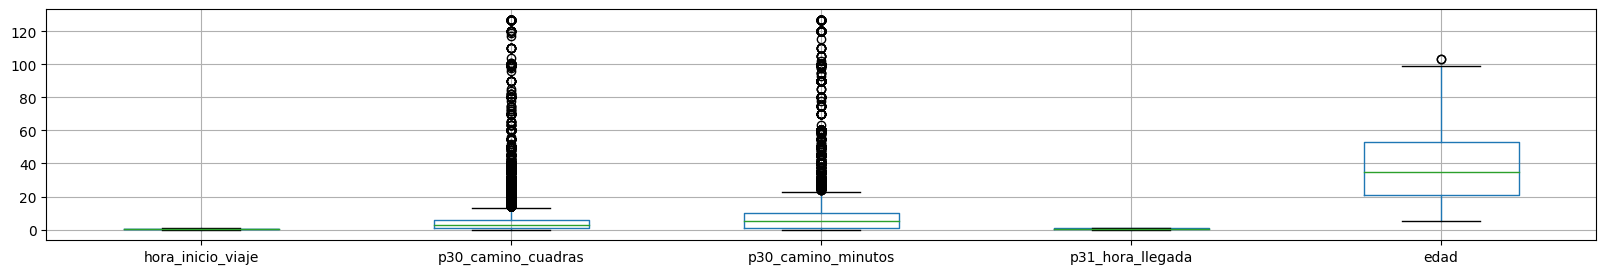

In [ ]:
%matplotlib inline

V_numeric = V_of[['hora_inicio_viaje', 'p30_camino_cuadras', 'p30_camino_minutos', 'p31_hora_llegada', 'edad']]
V_numeric.boxplot(figsize=(20,3))

Se puede observar que las variables referentes a la caminata previa al modo principal tienen varios outliers.

<Axes: >

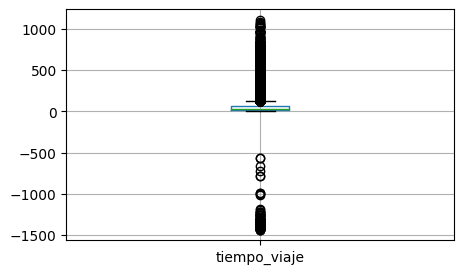

In [ ]:
V_numeric = V_of[['tiempo_viaje']]
V_numeric.boxplot(figsize=(5,3))

En el boxplot del tiempo de viaje, se observan que existen valores negativos, algo que no tiene sentido teniendo en cuenta lo que significa la variable. Como esta variable fue construida a partir de la hora de inicio y hora de llegada, se decide emplear otro conjunto de datos con el fin de modificar las tres variables.

In [ ]:
Aux = pd.read_csv('/content/Aux_DuraciónEODH2019.csv',sep=';').drop(columns=['modo_principal','f_exp'])
identificacion = ['id_hogar','id_persona','id_viaje']
for i in identificacion:
  Aux[i] = Aux[i].astype(str)
  V_of[i] = V_of[i].astype(str)
for i in list(filter(lambda x: x not in identificacion, Aux.columns.tolist())): Aux[i] = Aux[i].astype(float)
V_un = V_of.drop(columns=['hora_inicio_viaje','p31_hora_llegada','tiempo_viaje'])
V_of = Aux.merge(V_un, how = 'right', on=['id_hogar','id_persona','id_viaje'])

In [ ]:
V_of = V_of.rename(columns={'duracion': 'tiempo_viaje'})
V_of.sample(3)

,id_hogar,id_persona,id_viaje,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,fecha,lugar_origen,zat_origen,p17_Id_motivo_viaje,...,estrato,tipo_vivienda,propiedad_vivienda,edad,nivel_educativo,ocupación,sexo,p15v_subsidio_SITP,A-ITTP,percentil_zat
113562,18768,1,2,0.7500,0.8333,120.0,43619.0,2.0,402.0,6,...,2,4,5,27,10,16,Mujer,4.0,23.58,20-40
36407,2535,3,2,0.7500,0.8125,90.0,43605.0,2.0,454.0,6,...,2,1,1,21,10,2,Mujer,4.0,542.91,80-100
90723,31304,1,2,0.6042,0.6285,35.0,43659.0,2.0,992.0,6,...,4,2,2,39,13,18,Hombre,4.0,529.28,80-100


<Axes: >

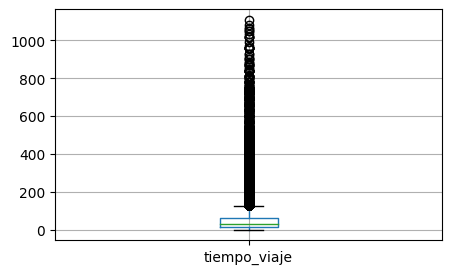

In [ ]:
V_numeric = V_of[['tiempo_viaje']]
V_numeric.boxplot(figsize=(5,3))

In [ ]:
def outliers(X, variable):
   desviacion = X[variable]
   Z = (desviacion-desviacion.mean())/desviacion.std()
   z = Z.loc[Z>3].index.tolist()
   median = V_of.loc[z,variable].median()
   X[variable] = np.where(X[variable]>median, median, X[variable])

In [ ]:
variables_outliers = ['p30_camino_cuadras','p30_camino_minutos', 'tiempo_viaje']
for i in variables_outliers: outliers(V_of, i)

<Axes: >

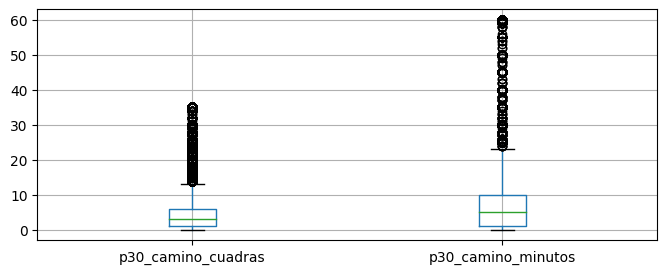

In [ ]:
V_numeric = V_of[['p30_camino_cuadras', 'p30_camino_minutos']]
V_numeric.boxplot(figsize=(8,3))

<Axes: >

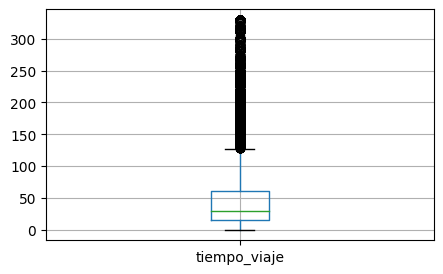

In [ ]:
V_numeric = V_of[['tiempo_viaje']]
V_numeric.boxplot(figsize=(5,3))

**Registros duplicados:**

In [ ]:
#Registros duplicados
duplicados = pd.DataFrame(V_of.duplicated(), columns=['B'])
print('Número de registros duplicados = %d' % (duplicados.sum()))

Número de registros duplicados = 0


**Reducción de dimensionalidad:**

Con el fin de poder clasificar las variables según la incidencia que tienen en la potencial caracterización de los datos y definir el orden d las variables según  a descartar en casos de reducción de dimensionalidad. Sin embargo, dada la cantidad de variables consideradas y el número de registros, el calculo de tantos valores se hace sumamente complejo en términos computacionales, por lo tanto, se selecciona una muestra 'representativa' de los registros para llevar a cabo la ejecución de la técnica.

In [ ]:
pip install rpy2

In [ ]:
#Tamaño de muestra
import rpy2.robjects as robjects
robjects.r('install.packages("samplingbook")')

#Cargar el paquete en R
robjects.r('library(samplingbook)')

(as ‘lib’ is unspecified)

















































	‘/tmp/RtmpC7xr14/downloaded_packages’







Attaching package: ‘survival’



    cluster, strata


Attaching package: ‘survey’



    dotchart




'sampling...,'survey','survival',...,'datasets','methods','base'


In [ ]:
n = str(V_of.shape[0])
s = robjects.r('sample.size.prop(e = 0.02, N='+n+',level=0.975)')
print(s)


sample.size.prop object: Sample size for proportion estimate
With finite population correction: N=127364, precision e=0.02 and expected proportion P=0.5

Sample size needed: 3065




In [ ]:
from sklearn.model_selection import train_test_split
X = V_of.drop(columns=['id_hogar','id_persona','id_viaje','fecha', 'lugar_origen','zat_origen', 'zat_destino', 'utam_origen', 'utam_destino',
             'p28_lugar_destino','p33_cual_aplicacion_antes_viaje','p34_aplicacion_durante_viaje','p34_cual_aplicacion_durante_viaje', 'mun_origen','mun_destino','estrato', 'A-ITTP'])
y = V_of['estrato']

_,X_s,__,y_s = train_test_split(X, y, test_size=3100, random_state=42, stratify=y)

In [ ]:
X_s['estrato'] = y_s
for i in ['edad','hora_inicio_viaje', 'p30_camino_cuadras', 'p30_camino_minutos', 'p31_hora_llegada', 'tiempo_viaje']:
   X_s[i+'_bins'] = pd.cut(X_s[i], bins=5, labels=['1', '2', '3', '4', '5'])
   X_s.drop(i, axis=1, inplace=True)
X_s = X_s.dropna()
X_s.head()

,p17_Id_motivo_viaje,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,...,sexo,p15v_subsidio_SITP,percentil_zat,estrato,edad_bins,hora_inicio_viaje_bins,p30_camino_cuadras_bins,p30_camino_minutos_bins,p31_hora_llegada_bins,tiempo_viaje_bins
27433,16,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,...,Hombre,4.0,20-40,3,1,3,1,1,4,3
69962,1,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,...,Mujer,4.0,20-40,3,3,2,1,1,2,1
62277,6,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,...,Mujer,4.0,20-40,0,1,4,1,1,4,1
96198,6,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0,...,Mujer,4.0,60-80,3,2,2,1,1,2,1
10725,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,...,Mujer,4.0,80-100,1,1,3,1,1,4,1


In [ ]:
for n in [i for i in X_s.columns if np.logical_or(X_s[i].dtype==float, X_s[i].dtype==int)]: X_s[n] = X_s[n].astype(int)
for n in [i for i in X_s.columns if X_s[i].dtype==object]:
  mapeo, valores = dict(), list(set(X_s[n]))
  for p in valores: mapeo[p] = int(valores.index(p))
  X_s[n] = X_s[n].replace(mapeo)
X_s = X_s.astype(int)

In [ ]:
def ranking_por_entropia(X,número_variables,ranking): #Ranking de las dimensiones por entropia
   def calculo_entropia(T):
     from scipy.spatial import distance
     hamming = 1 - distance.pdist(T,metric='hamming')
     entropia = np.where(np.logical_and(hamming>0, hamming<1), (hamming*np.log(hamming))+((1-hamming)*np.log(1-hamming)),0)
     return -(entropia.sum())
   if len(ranking) < número_variables:
     E_total = calculo_entropia(X)
     E = [np.abs(E_total - calculo_entropia(X.drop(i, axis=1))) for i in X.columns]
     ranking.append(X.columns[E.index(np.min(E))])
     ranking_por_entropia(X.drop(columns=[X.columns[E.index(np.min(E))]]), número_variables, ranking)
   else:
     ranking.append(X.columns[0])
   return ranking

ranking = ranking_por_entropia(X_s,X.shape[1],[])

<ipython-input-61-c8c40b480889>:5: RuntimeWarning: divide by zero encountered in log
  entropia = np.where(np.logical_and(hamming>0, hamming<1), (hamming*np.log(hamming))+((1-hamming)*np.log(1-hamming)),0)
<ipython-input-61-c8c40b480889>:5: RuntimeWarning: invalid value encountered in multiply
  entropia = np.where(np.logical_and(hamming>0, hamming<1), (hamming*np.log(hamming))+((1-hamming)*np.log(1-hamming)),0)
<ipython-input-61-c8c40b480889>:5: RuntimeWarning: divide by zero encountered in log
  entropia = np.where(np.logical_and(hamming>0, hamming<1), (hamming*np.log(hamming))+((1-hamming)*np.log(1-hamming)),0)
<ipython-input-61-c8c40b480889>:5: RuntimeWarning: invalid value encountered in multiply
  entropia = np.where(np.logical_and(hamming>0, hamming<1), (hamming*np.log(hamming))+((1-hamming)*np.log(1-hamming)),0)
<ipython-input-61-c8c40b480889>:5: RuntimeWarning: divide by zero encountered in log
  entropia = np.where(np.logical_and(hamming>0, hamming<1), (hamming*np.log(hamming

In [ ]:
print('Ranking de las variables por entropía:')
for i in range(len(ranking)): print(str(i+1)+':',ranking[i])

Ranking de las variables por entropía:
1: p31_hora_llegada_bins
2: p32_viernes
3: edad_bins
4: p17_Id_motivo_viaje
5: p30_camino_minutos_bins
6: tiempo_viaje_bins
7: propiedad_vivienda
8: tipo_vivienda
9: sexo
10: hora_inicio_viaje_bins
11: p30_camino_cuadras_bins
12: estrato
13: p32_sabado
14: p32_ocasional
15: percentil_zat
16: p32_lunes
17: p32_miercoles
18: p32_martes
19: p32_jueves
20: p32_domingo
21: modo_principal
22: p33_aplicacion_antes_viaje
23: ocupación
24: nivel_educativo
25: p15v_subsidio_SITP


**Procesamiento - Asociación:**

In [ ]:
print('Número de atributos iniciales = %d' % (V_of.shape[1]))
#Eliminar atributos de identificación, la fecha y las zonas geográficas
variables = ['id_hogar','id_persona','id_viaje','fecha','zat_origen', 'zat_destino', 'utam_origen', 'utam_destino','p28_lugar_destino',
             'p33_cual_aplicacion_antes_viaje','p34_aplicacion_durante_viaje','p34_cual_aplicacion_durante_viaje', 'mun_origen','mun_destino','A-ITTP']
V_asociacion = V_of.drop(columns=variables)
print('Número de atributos para asociación = %d' % (V_asociacion.shape[1]))

Número de atributos iniciales = 41
Número de atributos para asociación = 26


In [ ]:
#Segmentar el conjunto según el origen de los viajes
V_asociacion_1 = V_asociacion.loc[V_asociacion['lugar_origen']=='1.0'].drop(columns=['lugar_origen'])
V_asociacion_2 = V_asociacion.loc[V_asociacion['lugar_origen']=='2.0'].drop(columns=['lugar_origen'])

In [ ]:
V_asociacion_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57623 entries, 0 to 127363
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hora_inicio_viaje           57623 non-null  float64
 1   p31_hora_llegada            57623 non-null  float64
 2   tiempo_viaje                57623 non-null  float64
 3   p17_Id_motivo_viaje         57623 non-null  object 
 4   p30_camino_cuadras          57623 non-null  float64
 5   p30_camino_minutos          57623 non-null  float64
 6   p32_lunes                   57623 non-null  float64
 7   p32_martes                  57623 non-null  float64
 8   p32_miercoles               57623 non-null  float64
 9   p32_jueves                  57623 non-null  float64
 10  p32_viernes                 57623 non-null  float64
 11  p32_sabado                  57623 non-null  float64
 12  p32_domingo                 57623 non-null  float64
 13  p32_ocasional               57

La aplicación de los algoritmos de asociación requiere que el conjunto de datos esté conformado únicamente por variables binarias. Si bien el conjunto contiene algunas variables de este tipo, la mayoría de variables son númericas y categóricas. Con respecto a las númericas, es necesario implementar procesos de discretización. En total, hay seis variables númericas (continuas): la hora de inicio, las cuadras caminadas, los minutos caminados, la hora de llegada, la edad y el tiempo de viaje. La discretización de estas variables se va a hacer asignando cada valor a una de las cinco categorías definidas por los intervalos formados por los percentiles 0, 20, 40, 60 y 100, de modo que cada dato quede contenido entre un limite inferior y superior.

In [ ]:
def percentil(X, variable, nombre, valor):
  X[nombre] = np.NaN
  for i in range(0,100,20):
    minimo, maximo = X[variable].quantile(i/100), X[variable].quantile((i+20)/100)
    X[nombre] = np.where(np.logical_and(X[variable]>=minimo,X[variable]<maximo),valor+': '+str(round(minimo,3))+'-'+str(round(maximo,3)),X[nombre])
  X[nombre] = np.where(X[nombre]=='nan',valor+': '+str(round(X[variable].quantile(0.8),3))+'-'+str(round(X[variable].quantile(1),3)),X[nombre])

In [ ]:
#Hora de inicio
for i in V_asociacion_1, V_asociacion_2: percentil(i,'hora_inicio_viaje','percentil_hora','Hora_inicio')
V_asociacion_1['percentil_hora'].sample(3)

5543      Hora_inicio: 0.25-0.292
46004    Hora_inicio: 0.375-0.531
70176    Hora_inicio: 0.292-0.375
Name: percentil_hora, dtype: object

In [ ]:
#Cuadras caminadas
for i in V_asociacion_1, V_asociacion_2: percentil(i,'p30_camino_cuadras','percentil_cuadras_caminadas','Cuadras_caminadas')
V_asociacion_1['percentil_cuadras_caminadas'].sample(3)

121598    Cuadras_caminadas: 4.0-8.0
18169     Cuadras_caminadas: 2.0-4.0
82295     Cuadras_caminadas: 0.0-2.0
Name: percentil_cuadras_caminadas, dtype: object

In [ ]:
#Minutos caminados
for i in V_asociacion_1, V_asociacion_2: percentil(i,'p30_camino_minutos','percentil_minutos','Minutos_caminados')
V_asociacion_1['percentil_minutos'].sample(3)

40874     Minutos_caminados: 5.0-10.0
43636     Minutos_caminados: 5.0-10.0
82447    Minutos_caminados: 15.0-60.0
Name: percentil_minutos, dtype: object

In [ ]:
#Hora de llegada
for i in V_asociacion_1, V_asociacion_2: percentil(i,'p31_hora_llegada','percentil_hora_llegada','Hora_llegada')
V_asociacion_1['percentil_hora_llegada'].sample(3)

15039    Hora_llegada: 0.562-0.999
65999    Hora_llegada: 0.424-0.562
375      Hora_llegada: 0.281-0.333
Name: percentil_hora_llegada, dtype: object

In [ ]:
#Edad
for i in V_asociacion_1, V_asociacion_2: percentil(i,'edad','percentil_edad','Edad')
V_asociacion_1['percentil_edad'].sample(3)

10274      Edad: 42.0-57.0
65224     Edad: 57.0-103.0
105306     Edad: 18.0-29.0
Name: percentil_edad, dtype: object

In [ ]:
#Tiempo de viaje
for i in V_asociacion_1, V_asociacion_2: percentil(i,'tiempo_viaje','percentil_tiempo_viaje','tiempo_viaje')
V_asociacion_1['percentil_tiempo_viaje'].sample(3)

41371    tiempo_viaje: 40.0-75.0
40890    tiempo_viaje: 20.0-40.0
69752     tiempo_viaje: 0.0-10.0
Name: percentil_tiempo_viaje, dtype: object

Con la transformación de las variables númericas garantizamos que todo posible valor esté presente en 20% de los registros. Dado que el algoritmo de asociación se aplica con un valor definido de soporte, cualquier valor que se encuentre en un porcentaje de registros inferior, directamente, está siendo descartado de hacer parte de una regla de asociación. En ese sentido, se propone reducir el conjunto de posibles elementos de ciertas variables categóricas. Igualmente, como varias están representadas por números, se transforman para que su lectura sea más fácil en la aplicación de las técnicas de asociación.

In [ ]:
#Nivel educativo
mapeo_educacion = {1: 'Inferior_secundaria', 2: 'Inferior_secundaria', 3: 'Inferior_secundaria', 4: 'Inferior_secundaria',
                   5: 'Secundaria-Media', 6: 'Secundaria-Media', 7: 'Secundaria-Media', 8: 'Estudios_tecnicos-profesionales',
                   9: 'Estudios_tecnicos-profesionales', 10: 'Estudios_tecnicos-profesionales', 11: 'Profesional-estudios_posgrado',
                   12: 'Profesional-estudios_posgrado', 13: 'Profesional-estudios_posgrado', 14: 'Inferior_secundaria'}

for n in V_asociacion_1, V_asociacion_2:
   n['nivel_educativo'] = n['nivel_educativo'].astype(int).replace(mapeo_educacion)
print(V_asociacion_1.groupby('nivel_educativo').size()/V_asociacion_1.shape[0])

nivel_educativo
Estudios_tecnicos-profesionales    0.199590
Inferior_secundaria                0.324714
Profesional-estudios_posgrado      0.223973
Secundaria-Media                   0.251722
dtype: float64


In [ ]:
#Ocupacion
mapeo_ocupacion = {1: 'Estudiante', 2: 'Estudiante', 3: 'Estudiante', 4: 'Estudiante', 5: 'Estudiante',
                   21: 'Excepcional', 33: 'Excepcional', 32: 'Excepcional', 34: 'Excepcional',
                   35: 'Excepcional', 36: 'Excepcional', 37: 'Excepcional', 38: 'Excepcional',
                   11: 'Empleado', 12: 'Empleado', 14: 'Empleado', 15: 'Empleado', 16: 'Empleado',
                   17: 'Empleado', 18: 'Independiente', 19: 'Independiente', 20: 'Independiente',
                   13: 'Labores domésticas', 31: 'Labores domésticas'}

for n in V_asociacion_1, V_asociacion_2:
   n['ocupación'] = n['ocupación'].astype(int).replace(mapeo_ocupacion)
print(V_asociacion_1.groupby('ocupación').size()/V_asociacion_1.shape[0])

ocupación
Empleado              0.279246
Estudiante            0.249102
Excepcional           0.130781
Independiente         0.167069
Labores domésticas    0.173802
dtype: float64


In [ ]:
#Tipo de vivienda
mapeo_tipo_vivienda = {1:'Casa', 2:'Apartamento', 3: 'Otra_vivienda', 4: 'Otra_vivienda',5: 'Otra_vivienda',6: 'Otra_vivienda'}

for n in V_asociacion_1, V_asociacion_2:
   n['tipo_vivienda'] = n['tipo_vivienda'].astype(int).replace(mapeo_tipo_vivienda)
print(V_asociacion_1.groupby('tipo_vivienda').size()/V_asociacion_1.shape[0])

tipo_vivienda
Apartamento      0.486976
Casa             0.484373
Otra_vivienda    0.028652
dtype: float64


In [ ]:
#Propiedad vivienda
mapeo_propiedad = {1:'Propia', 2:'Propia', 3: 'Arriendo', 4: 'Arriendo',5: 'Otra_propiedad',6: 'Otra_propiedad',7: 'Otra_propiedad',8: 'Otra_propiedad'}

for n in V_asociacion_1, V_asociacion_2:
   n['propiedad_vivienda'] = n['propiedad_vivienda'].astype(int).replace(mapeo_propiedad)
print(V_asociacion_1.groupby('propiedad_vivienda').size()/V_asociacion_1.shape[0])

propiedad_vivienda
Arriendo          0.403016
Otra_propiedad    0.026344
Propia            0.570640
dtype: float64


In [ ]:
#Motivo de viaje
mapeo_motivo = {1: 'Trabajo', 2: 'Trabajo', 13: 'Trabajo', 4: 'Cuidado', 7: 'Cuidado',
                15: 'Esparcimiento', 8: 'Diligencias', 11: 'Diligencias', 5: 'Esparcimiento',
                9: 'Esparcimiento', 10: 'Esparcimiento', 12: 'Esparcimiento', 14: 'Esparcimiento',
                16: 'Esparcimiento', 3: 'Estudio', 6: 'Volver a casa', 77: 'Otro'}

for n in V_asociacion_1, V_asociacion_2:
   n['p17_Id_motivo_viaje'] = n['p17_Id_motivo_viaje'].astype(int).replace(mapeo_motivo)
print(V_asociacion_1.groupby('p17_Id_motivo_viaje').size()/V_asociacion_1.shape[0])

p17_Id_motivo_viaje
Cuidado          0.154765
Diligencias      0.083439
Esparcimiento    0.207660
Estudio          0.201968
Otro             0.002603
Trabajo          0.342433
Volver a casa    0.007133
dtype: float64


In [ ]:
#Modo de transporte
mapeo_modo = {'Alimentador':'Complemento','Otro':'Complemento','Bicitaxi':'Complemento','Patineta':'Complemento','Cable':'Complemento','SITP Provisional':'SITP',
              'SITP Zonal':'SITP'}

for n in V_asociacion_1, V_asociacion_2:
   n['modo_principal'] = n['modo_principal'].replace(mapeo_modo)
print(V_asociacion_1.groupby('modo_principal').size()/V_asociacion_1.shape[0])

modo_principal
A pie                            0.375302
Auto                             0.126304
Bicicleta                        0.061312
Complemento                      0.028235
Intermunicipal                   0.026673
Moto                             0.042865
SITP                             0.120716
TransMilenio                     0.124725
Transporte Escolar               0.028981
Transporte informal              0.030561
Transporte publico individual    0.034327
dtype: float64


In [ ]:
#Estrato
mapeo_estrato = {0:'Ingreso_bajo', 1:'Ingreso_bajo',2:'Ingreso_bajo', 3:'Ingreso_medio', 4:'Ingreso_medio',5:'Ingreso_alto', 6:'Ingreso_alto'}

for n in V_asociacion_1, V_asociacion_2:
   n['estrato'] = n['estrato'].astype(int).replace(mapeo_estrato)
print(V_asociacion_1.groupby('estrato').size()/V_asociacion_1.shape[0])

estrato
Ingreso_alto     0.054648
Ingreso_bajo     0.509415
Ingreso_medio    0.435937
dtype: float64


In [ ]:
#Subsidio SITP
mapeo_estrato = {1:'subsidio_adulto', 2:'subsidio_discapacidad',3:'subsidio_SISBEN', 4:'Sin subsidio'}

for n in V_asociacion_1, V_asociacion_2:
   n['p15v_subsidio_SITP'] = n['p15v_subsidio_SITP'].astype(int).replace(mapeo_estrato)
print(V_asociacion_1.groupby('p15v_subsidio_SITP').size()/V_asociacion_1.shape[0])

p15v_subsidio_SITP
Sin subsidio             0.966906
subsidio_SISBEN          0.011905
subsidio_adulto          0.016539
subsidio_discapacidad    0.004651
dtype: float64


In [ ]:
for n in V_asociacion_1, V_asociacion_2: n.drop(columns=['hora_inicio_viaje', 'p30_camino_cuadras', 'p30_camino_minutos', 'p31_hora_llegada', 'edad', 'tiempo_viaje'], inplace=True)

In [ ]:
V_asociacion_1.sample(7)

,p17_Id_motivo_viaje,p32_lunes,p32_martes,p32_miercoles,p32_jueves,p32_viernes,p32_sabado,p32_domingo,p32_ocasional,p33_aplicacion_antes_viaje,...,ocupación,sexo,p15v_subsidio_SITP,percentil_zat,percentil_hora,percentil_cuadras_caminadas,percentil_minutos,percentil_hora_llegada,percentil_edad,percentil_tiempo_viaje
1562,Esparcimiento,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,Estudiante,Mujer,Sin subsidio,20-40,Hora_inicio: 0.375-0.531,Cuadras_caminadas: 8.0-35.0,Minutos_caminados: 15.0-60.0,Hora_llegada: 0.424-0.562,Edad: 5.0-18.0,tiempo_viaje: 10.0-20.0
52915,Cuidado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,Excepcional,Hombre,Sin subsidio,60-80,Hora_inicio: 0.531-0.999,Cuadras_caminadas: 0.0-2.0,Minutos_caminados: 0.0-5.0,Hora_llegada: 0.562-0.999,Edad: 57.0-103.0,tiempo_viaje: 40.0-75.0
3156,Trabajo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,...,Labores domésticas,Mujer,Sin subsidio,60-80,Hora_inicio: 0.0-0.25,Cuadras_caminadas: 4.0-8.0,Minutos_caminados: 10.0-15.0,Hora_llegada: 0.333-0.424,Edad: 18.0-29.0,tiempo_viaje: 75.0-330.0
32880,Estudio,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0,...,Estudiante,Hombre,Sin subsidio,60-80,Hora_inicio: 0.25-0.292,Cuadras_caminadas: 2.0-4.0,Minutos_caminados: 15.0-60.0,Hora_llegada: 0.281-0.333,Edad: 5.0-18.0,tiempo_viaje: 40.0-75.0
29879,Trabajo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0,...,Empleado,Hombre,Sin subsidio,20-40,Hora_inicio: 0.375-0.531,Cuadras_caminadas: 8.0-35.0,Minutos_caminados: 15.0-60.0,Hora_llegada: 0.562-0.999,Edad: 29.0-42.0,tiempo_viaje: 75.0-330.0
78412,Trabajo,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,Empleado,Hombre,Sin subsidio,20-40,Hora_inicio: 0.0-0.25,Cuadras_caminadas: 0.0-2.0,Minutos_caminados: 0.0-5.0,Hora_llegada: 0.0-0.281,Edad: 29.0-42.0,tiempo_viaje: 40.0-75.0
33632,Diligencias,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,...,Independiente,Hombre,Sin subsidio,20-40,Hora_inicio: 0.531-0.999,Cuadras_caminadas: 2.0-4.0,Minutos_caminados: 0.0-5.0,Hora_llegada: 0.562-0.999,Edad: 42.0-57.0,tiempo_viaje: 40.0-75.0


In [ ]:
def one_hot_encoding(X):
  df_encoded = pd.get_dummies(X, columns=[i for i in X.columns if i not in ['p32_lunes','p32_martes','p32_miercoles','p32_jueves','p32_viernes','p32_sabado','p32_domingo','p32_ocasional']],
                              prefix='', prefix_sep='')
  return df_encoded

In [ ]:
V_asociacion_1, V_asociacion_2 = one_hot_encoding(V_asociacion_1).astype(int), one_hot_encoding(V_asociacion_2).astype(int)

In [ ]:
#V_asociacion_1.to_csv('V_asociacion_1.csv')
#V_asociacion_2.to_csv('V_asociacion_2.csv')

**Procesamiento - Agrupación:**

In [ ]:
print('Número de atributos iniciales = %d' % (V_of.shape[1]))
#Eliminar atributos de identificación, la fecha y las zonas geográficas
variables = ['id_hogar','id_persona','id_viaje','fecha','zat_origen', 'zat_destino', 'utam_origen', 'utam_destino',
             'p28_lugar_destino','p33_cual_aplicacion_antes_viaje','p34_aplicacion_durante_viaje','p34_cual_aplicacion_durante_viaje', 'mun_origen','mun_destino', 'percentil_zat']
V_agrupacion = V_of.drop(columns=variables)
print('Número de atributos para agrupación = %d' % (V_agrupacion.shape[1]))

Número de atributos iniciales = 41
Número de atributos para agrupación = 26


In [ ]:
V_agrupacion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127364 entries, 0 to 127363
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   hora_inicio_viaje           127364 non-null  float64
 1   p31_hora_llegada            127364 non-null  float64
 2   tiempo_viaje                127364 non-null  float64
 3   lugar_origen                127364 non-null  object 
 4   p17_Id_motivo_viaje         127364 non-null  object 
 5   p30_camino_cuadras          127364 non-null  float64
 6   p30_camino_minutos          127364 non-null  float64
 7   p32_lunes                   127364 non-null  float64
 8   p32_martes                  127364 non-null  float64
 9   p32_miercoles               127364 non-null  float64
 10  p32_jueves                  127364 non-null  float64
 11  p32_viernes                 127364 non-null  float64
 12  p32_sabado                  127364 non-null  float64
 13  p32_domingo   

**Metodo de Componentes Principales**

In [ ]:
from sklearn.decomposition import PCA
binarias = V_agrupacion.loc[:,['p32_lunes','p32_martes','p32_miercoles','p32_jueves','p32_viernes','p32_sabado','p32_domingo','p32_ocasional']].astype(float)
pca = PCA(n_components=2)
binarias_reducido = pca.fit_transform(binarias)
binarias_reducido = pd.DataFrame(binarias_reducido, columns=['pc1', 'pc2'])
binarias_reducido['index'] = V_agrupacion.index.tolist()
binarias_reducido

,pc1,pc2,index
0,0.164475,-0.701884,0
1,1.307636,-0.029331,1
2,-1.117058,-0.375261,2
3,-1.117058,-0.375261,3
4,-0.889013,0.933602,4
...,...,...,...
127359,-1.117058,-0.375261,127359
127360,-1.117058,-0.375261,127360
127361,-0.859074,0.655261,127361
127362,-0.859074,0.655261,127362


In [ ]:
V_agrupacion = V_agrupacion.reset_index().merge(binarias_reducido, how='left', on='index')
V_agrupacion = V_agrupacion.drop(columns=['index','p32_lunes','p32_martes','p32_miercoles','p32_jueves','p32_viernes','p32_sabado','p32_domingo','p32_ocasional'])
V_agrupacion

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,lugar_origen,p17_Id_motivo_viaje,p30_camino_cuadras,p30_camino_minutos,p33_aplicacion_antes_viaje,modo_principal,estrato,tipo_vivienda,propiedad_vivienda,edad,nivel_educativo,ocupación,sexo,p15v_subsidio_SITP,A-ITTP,pc1,pc2
0,0.3333,0.3542,30.0,1.0,5,5.0,5.0,0,SITP Provisional,3,1,3,37,2,38,Mujer,4.0,180.41,0.164475,-0.701884
1,0.6250,0.6667,60.0,2.0,6,2.0,3.0,0,Transporte informal,2,2,1,60,2,31,Mujer,4.0,476.04,1.307636,-0.029331
2,0.2500,0.3125,90.0,1.0,1,4.0,15.0,0,SITP Zonal,2,2,1,28,13,16,Hombre,4.0,303.53,-1.117058,-0.375261
3,0.3333,0.3472,20.0,1.0,1,5.0,5.0,0,SITP Zonal,4,1,3,21,10,2,Hombre,4.0,54.64,-1.117058,-0.375261
4,0.7083,0.7708,90.0,2.0,6,2.0,3.0,0,Transporte informal,0,2,2,34,7,19,Mujer,4.0,51.88,-0.889013,0.933602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127359,0.5625,0.6458,120.0,2.0,6,3.0,5.0,0,TransMilenio,2,2,4,30,9,16,Mujer,4.0,140.71,-1.117058,-0.375261
127360,0.6354,0.6424,10.0,2.0,6,15.0,7.0,0,A pie,3,2,3,23,11,16,Hombre,4.0,175.50,-1.117058,-0.375261
127361,0.6458,0.7431,140.0,1.0,1,7.0,10.0,0,TransMilenio,1,1,1,34,7,16,Hombre,4.0,1.38,-0.859074,0.655261
127362,0.5833,0.5938,15.0,2.0,6,10.0,15.0,0,A pie,2,2,3,24,11,17,Mujer,4.0,1.38,-0.859074,0.655261


Análisis de correspondencia

In [ ]:
#Nivel educativo
mapeo_educacion = {1: 'Inferior_secundaria', 2: 'Inferior_secundaria', 3: 'Inferior_secundaria', 4: 'Inferior_secundaria',
                   5: 'Secundaria-Media', 6: 'Secundaria-Media', 7: 'Secundaria-Media', 8: 'Estudios_tecnicos-profesionales',
                   9: 'Estudios_tecnicos-profesionales', 10: 'Estudios_tecnicos-profesionales', 11: 'Profesional-estudios_posgrado',
                   12: 'Profesional-estudios_posgrado', 13: 'Profesional-estudios_posgrado', 14: 'Inferior_secundaria'}


V_agrupacion['nivel_educativo'] = V_agrupacion['nivel_educativo'].astype(int).replace(mapeo_educacion)

In [ ]:
#Ocupacion
mapeo_ocupacion = {1: 'Estudiante', 2: 'Estudiante', 3: 'Estudiante', 4: 'Estudiante', 5: 'Estudiante',
                   21: 'Excepcional', 33: 'Excepcional', 32: 'Excepcional', 34: 'Excepcional',
                   35: 'Excepcional', 36: 'Excepcional', 37: 'Excepcional', 38: 'Excepcional',
                   11: 'Empleado', 12: 'Empleado', 14: 'Empleado', 15: 'Empleado', 16: 'Empleado',
                   17: 'Empleado', 18: 'Independiente', 19: 'Independiente', 20: 'Independiente',
                   13: 'Labores domésticas', 31: 'Labores domésticas'}

V_agrupacion['ocupación'] = V_agrupacion['ocupación'].astype(int).replace(mapeo_ocupacion)

In [ ]:
#Tipo de vivienda
mapeo_tipo_vivienda = {1:'Casa', 2:'Apartamento', 3: 'Otra_vivienda', 4: 'Otra_vivienda',5: 'Otra_vivienda',6: 'Otra_vivienda'}

V_agrupacion['tipo_vivienda'] = V_agrupacion['tipo_vivienda'].astype(int).replace(mapeo_tipo_vivienda)

In [ ]:
#Propiedad vivienda
mapeo_propiedad = {1:'Propia', 2:'Propia', 3: 'Arriendo', 4: 'Arriendo',5: 'Otra_propiedad',6: 'Otra_propiedad',7: 'Otra_propiedad',8: 'Otra_propiedad'}

V_agrupacion['propiedad_vivienda'] = V_agrupacion['propiedad_vivienda'].astype(int).replace(mapeo_propiedad)

In [ ]:
#Modo de transporte
mapeo_modo = {'Alimentador':'Complemento','Otro':'Complemento','Bicitaxi':'Complemento','Patineta':'Complemento','Cable':'Complemento','SITP Provisional':'SITP',
              'SITP Zonal':'SITP'}

V_agrupacion['modo_principal'] = V_agrupacion['modo_principal'].replace(mapeo_modo)

In [ ]:
#Estrato
mapeo_estrato = {0:'Ingreso_bajo', 1:'Ingreso_bajo',2:'Ingreso_bajo', 3:'Ingreso_medio', 4:'Ingreso_medio',5:'Ingreso_alto', 6:'Ingreso_alto'}

V_agrupacion['estrato'] = V_agrupacion['estrato'].astype(int).replace(mapeo_estrato)

Reducción de los valores de ciertas variables.

In [ ]:
pip install prince

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.4 MB/s eta 0:00:00


In [ ]:
categoricas = [col for col in V_agrupacion.columns if V_agrupacion[col].dtype == object]
categoricas.remove('lugar_origen')
for col in categoricas: V_agrupacion[col] = V_agrupacion[col].astype(str)
v_categoricas = V_agrupacion.loc[:,categoricas]

In [ ]:
from prince import MCA
mca = MCA(n_components=2)
mca.fit(v_categoricas)
categoricas_reducidas = mca.transform(v_categoricas)
categoricas_reducidas.columns = ['mca1', 'mca2']
categoricas_reducidas['index'] = V_agrupacion.index.tolist()
categoricas_reducidas

,mca1,mca2,index
0,-0.169589,-0.223726,0
1,-0.258608,-0.280130,1
2,0.588834,0.108957,2
3,0.001165,0.281482,3
4,0.147385,-0.200494,4
...,...,...,...
127359,0.104710,-0.129201,127359
127360,0.352403,0.167782,127360
127361,0.245791,-0.158110,127361
127362,0.114708,-0.133757,127362


In [ ]:
V_agrupacion = V_agrupacion.reset_index().merge(categoricas_reducidas, how='left', on='index')
categoricas.append('index')
V_agrupacion = V_agrupacion.drop(columns=categoricas)
V_agrupacion

,hora_inicio_viaje,p31_hora_llegada,tiempo_viaje,lugar_origen,p30_camino_cuadras,p30_camino_minutos,edad,p15v_subsidio_SITP,A-ITTP,pc1,pc2,mca1,mca2
0,0.3333,0.3542,30.0,1.0,5.0,5.0,37,4.0,180.41,0.164475,-0.701884,-0.169589,-0.223726
1,0.6250,0.6667,60.0,2.0,2.0,3.0,60,4.0,476.04,1.307636,-0.029331,-0.258608,-0.280130
2,0.2500,0.3125,90.0,1.0,4.0,15.0,28,4.0,303.53,-1.117058,-0.375261,0.588834,0.108957
3,0.3333,0.3472,20.0,1.0,5.0,5.0,21,4.0,54.64,-1.117058,-0.375261,0.001165,0.281482
4,0.7083,0.7708,90.0,2.0,2.0,3.0,34,4.0,51.88,-0.889013,0.933602,0.147385,-0.200494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127359,0.5625,0.6458,120.0,2.0,3.0,5.0,30,4.0,140.71,-1.117058,-0.375261,0.104710,-0.129201
127360,0.6354,0.6424,10.0,2.0,15.0,7.0,23,4.0,175.50,-1.117058,-0.375261,0.352403,0.167782
127361,0.6458,0.7431,140.0,1.0,7.0,10.0,34,4.0,1.38,-0.859074,0.655261,0.245791,-0.158110
127362,0.5833,0.5938,15.0,2.0,10.0,15.0,24,4.0,1.38,-0.859074,0.655261,0.114708,-0.133757


Normalización.

In [ ]:
numericas = [col for col in V_agrupacion.columns if V_agrupacion[col].dtype == float]
for i in 'edad','mca1','mca2': numericas.append(i)
numericas.remove('p15v_subsidio_SITP')
V_agrupacion = V_agrupacion.astype(object)
for col in numericas: V_agrupacion[col] = V_agrupacion[col].astype(float)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
escala = MinMaxScaler(feature_range=(0, 1))
V_agrupacion[numericas] = escala.fit_transform(V_agrupacion[numericas])

In [ ]:
#Segmentar el conjunto según el origen de los viajes
V_agrupacion_1 = V_agrupacion.loc[V_agrupacion['lugar_origen']=='1.0'].drop(columns=['lugar_origen']).astype(float)
V_agrupacion_2 = V_agrupacion.loc[V_agrupacion['lugar_origen']=='2.0'].drop(columns=['lugar_origen']).astype(float)

In [ ]:
V_agrupacion_1.to_csv('V_Agrupacion_1.csv')
V_agrupacion_2.to_csv('V_Agrupacion_2.csv')

**Asocciación:**

In [ ]:
import pandas as pd
Asociacion_1= V_asociacion_1.drop(['0','1.0', 'p32_lunes', 'p32_martes', 'p32_miercoles', 'p32_jueves', 'p32_viernes',
       'p32_sabado', 'p32_domingo', 'p32_ocasional', 'Sin subsidio'], axis=1)
Asociacion_1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Cuidado,Diligencias,Esparcimiento,Estudio,Otro,Trabajo,Volver a casa,A pie,Auto,Bicicleta,...,Edad: 18.0-29.0,Edad: 29.0-42.0,Edad: 42.0-57.0,Edad: 5.0-18.0,Edad: 57.0-103.0,tiempo_viaje: 0.0-10.0,tiempo_viaje: 10.0-20.0,tiempo_viaje: 20.0-40.0,tiempo_viaje: 40.0-75.0,tiempo_viaje: 75.0-330.0
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
6,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
8,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127350,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
127352,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
127357,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
127361,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
conjuntos_frecuentes = apriori(Asociacion_1, min_support=0.1, use_colnames=True)
reglas = association_rules(conjuntos_frecuentes, metric="confidence", min_threshold=0.7)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
reg = pd.DataFrame(reglas)
reg

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Estudio),(Estudiante),0.201968,0.249102,0.188744,0.934525,3.751576,0.138433,11.468441,0.919068
1,(Estudiante),(Estudio),0.249102,0.201968,0.188744,0.757698,3.751576,0.138433,3.293546,0.976758
2,(Estudio),(Edad: 5.0-18.0),0.201968,0.194766,0.156379,0.774274,3.975406,0.117042,3.567306,0.937874
3,(Edad: 5.0-18.0),(Estudio),0.194766,0.201968,0.156379,0.802905,3.975406,0.117042,4.048966,0.929486
4,(Empleado),(Trabajo),0.279246,0.342433,0.209569,0.750482,2.191618,0.113946,2.635346,0.754371
...,...,...,...,...,...,...,...,...,...,...
108,"(Ingreso_bajo, 20-40, Propia)",(Casa),0.140586,0.484373,0.108759,0.773608,1.597135,0.040663,2.277589,0.435039
109,"(Minutos_caminados: 0.0-5.0, Casa, Propia)",(Cuadras_caminadas: 0.0-2.0),0.119935,0.380525,0.101991,0.850383,2.234763,0.056352,4.140417,0.627823
110,"(Cuadras_caminadas: 0.0-2.0, Casa, Propia)",(Minutos_caminados: 0.0-5.0),0.118251,0.379449,0.101991,0.862489,2.273003,0.057120,4.512736,0.635162
111,"(Hombre, Minutos_caminados: 0.0-5.0, Propia)",(Cuadras_caminadas: 0.0-2.0),0.124863,0.380525,0.109574,0.877554,2.306165,0.062061,5.059162,0.647190
